## Recipe 5-1. Data Preparation for the Supervised Model

In [28]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable
import torch.nn.functional as F
%matplotlib inline

In [29]:
torch.__version__

'1.7.1'

In [30]:
df = pd.read_csv("C:/Users/Andy/Andy's Learning/Pytorch/mtcars.csv")

In [31]:
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [32]:
torch.manual_seed(1234)    # reproducible

In [33]:
x = torch.unsqueeze(torch.from_numpy(np.array(df.qsec)),dim=1)
y = torch.unsqueeze(torch.from_numpy(np.array(df.mpg)),dim=1)

In [34]:
x[0:10]

tensor([[16.4600],
        [17.0200],
        [18.6100],
        [19.4400],
        [17.0200],
        [20.2200],
        [15.8400],
        [20.0000],
        [22.9000],
        [18.3000]], dtype=torch.float64)

In [35]:
y[0:10]

tensor([[21.0000],
        [21.0000],
        [22.8000],
        [21.4000],
        [18.7000],
        [18.1000],
        [14.3000],
        [24.4000],
        [22.8000],
        [19.2000]], dtype=torch.float64)

# Recipe 5-2. Forward and Backward Propagation

In [36]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

In [37]:
net = Net(n_feature=1, n_hidden=20, n_output=1)   
net.double()
print(net)  # Neural network architecture

Net(
  (hidden): Linear(in_features=1, out_features=20, bias=True)
  (predict): Linear(in_features=20, out_features=1, bias=True)
)


In [38]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()  
# this is for regression mean squared loss

### There are various optimization functions:
#### SparseAdam. Implements a lazy version of the Adam algorithm suitable for sparse tensors.
#### SGD. Implements stochastic gradient descent (optionally with momentum).
#### Adadelta. Adaptive learning rate. 
#### Adagrad. Adaptive subgradient methods for online learning and stochastic optimization.
#### Adam. A method for stochastic optimization.
#### ASGD. Acceleration of stochastic approximation by averaging. 
#### RMSprop algorithm. Uses a magnitude of gradients that are calculated to normalize the gradients.

### there are various loss functions
#### MSELoss. 
##### Creates a criterion that measures the mean squared error between elements in the input variable and target variable. For regression-related problems, this is the best loss function.

In [39]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.2
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [40]:
loss_func

MSELoss()

In [41]:
#Turn the interactive mode on
plt.ion()

# Recipe 5-3. Optimization and Gradient Computation

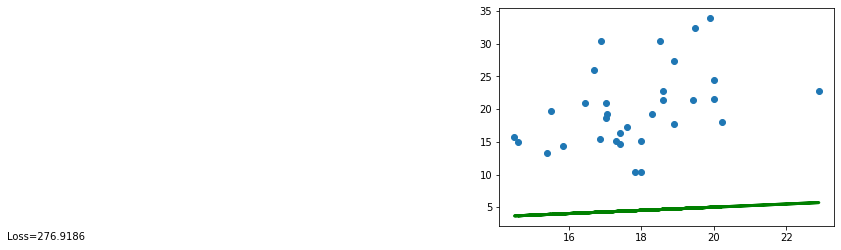

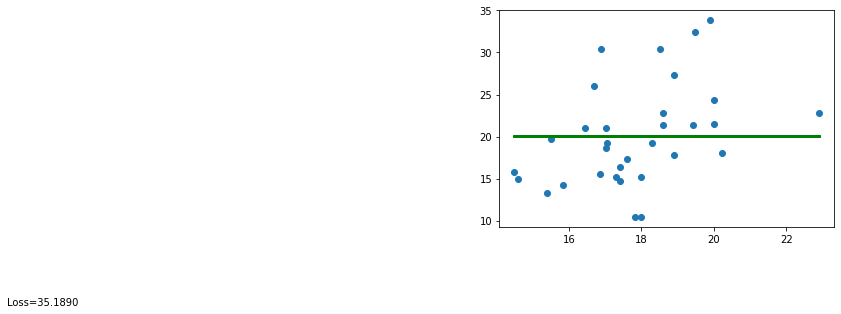

In [42]:
for t in range(100):
    prediction = net(x)     # input x and predict based on x
    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)
    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

    if t % 50 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'g-', lw=3)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy())
        plt.show()
plt.ioff()

# Recipe 5-4. Viewing Predictions Problem

In [43]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.001)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

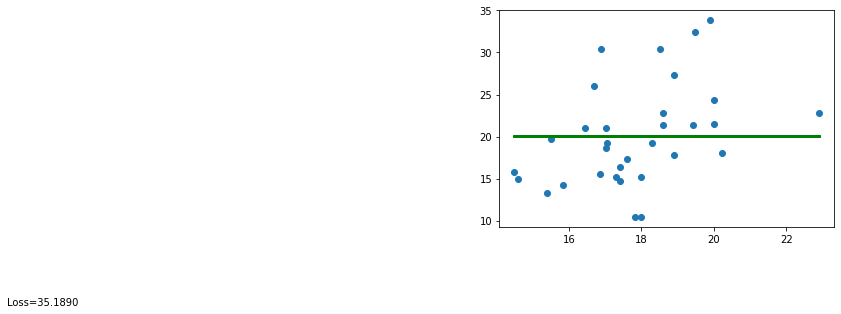

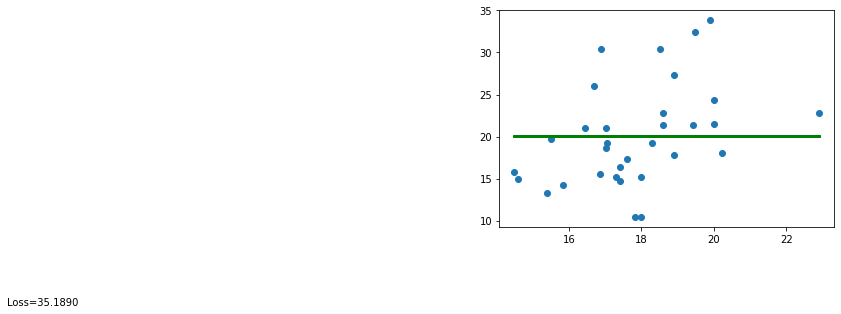

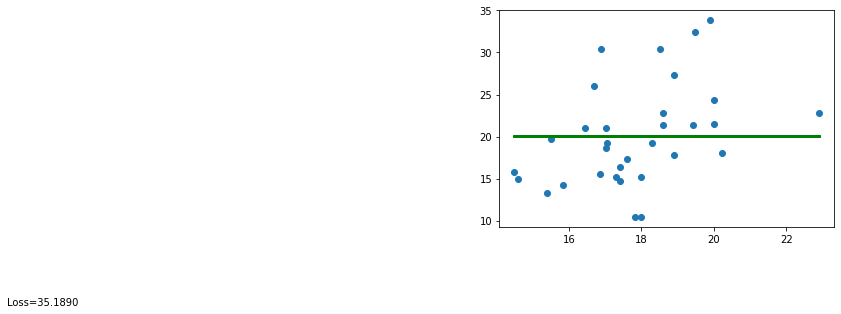

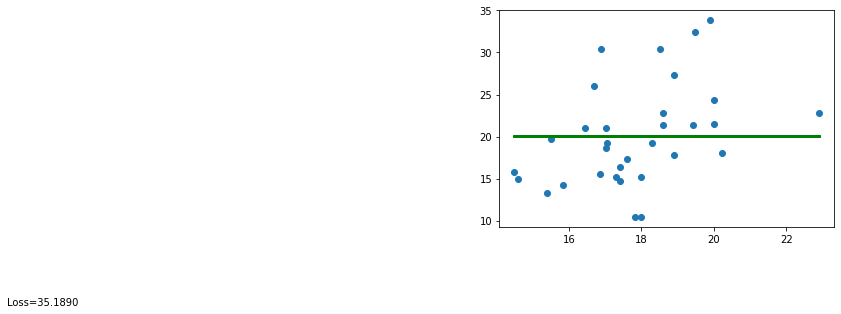

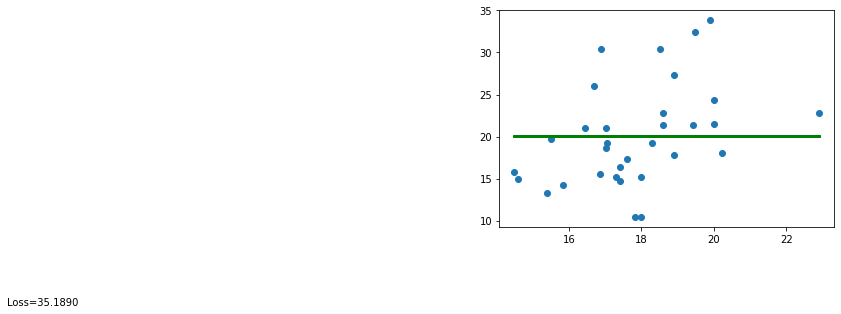

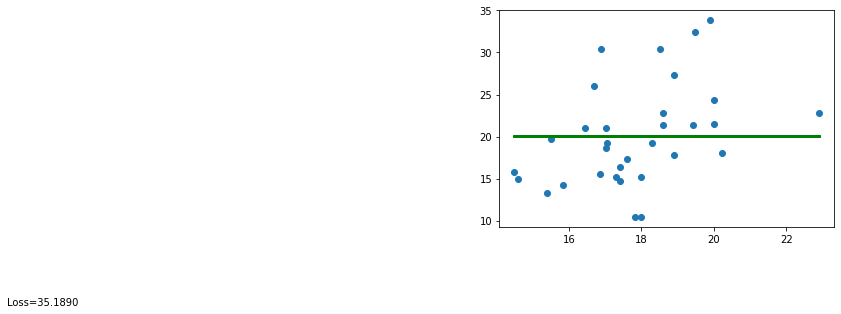

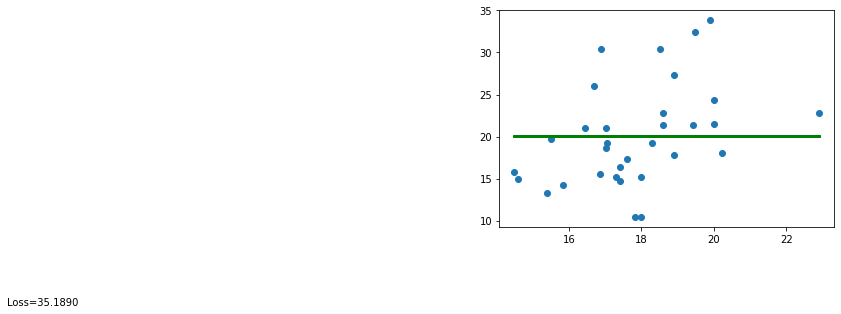

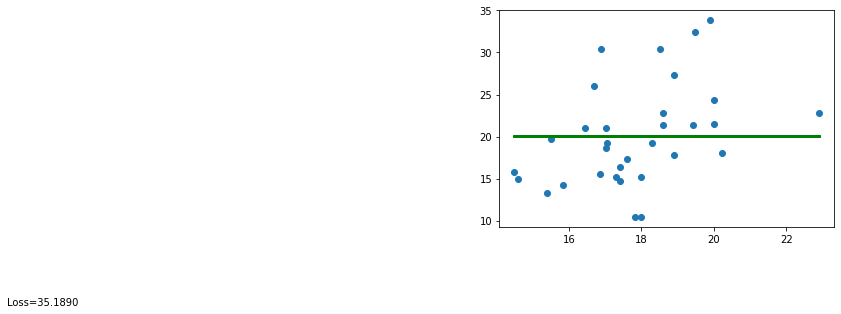

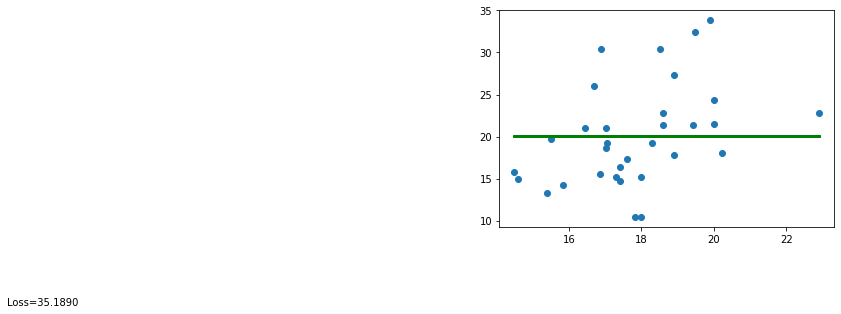

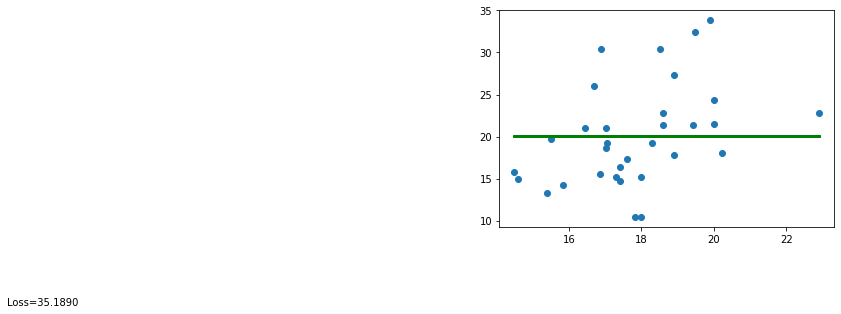

In [44]:
for t in range(1000):
    prediction = net(x)     # input x and predict based on x
    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)
    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

    if t % 100 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'g-', lw=3)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy())
        plt.show()
plt.ioff() #Turn the interactive mode off

In [45]:
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [46]:
x = torch.unsqueeze(torch.from_numpy(np.array(df.mpg)),dim=1)
y = torch.unsqueeze(torch.from_numpy(np.array(df.qsec)),dim=1)

In [47]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

In [48]:
plt.ion() #Turn the interactive mode on

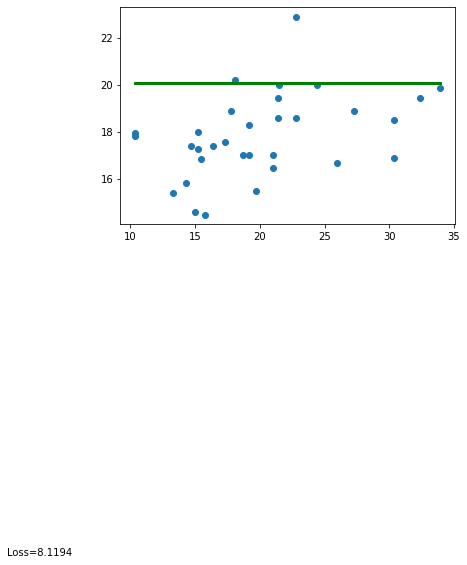

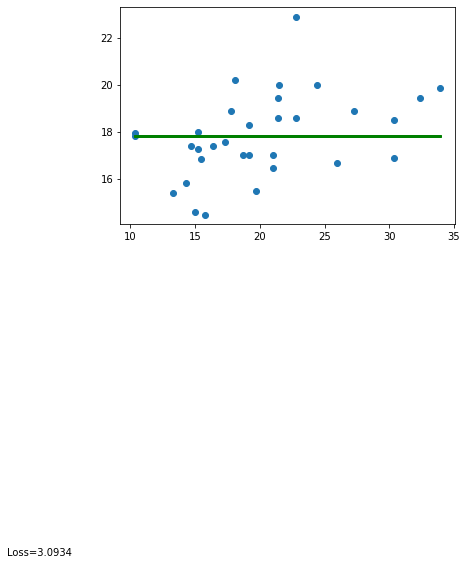

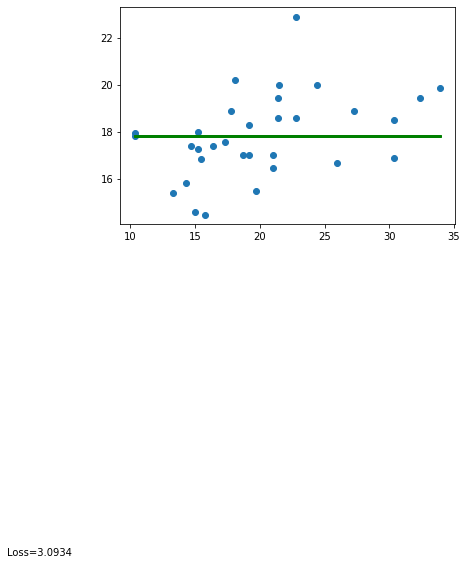

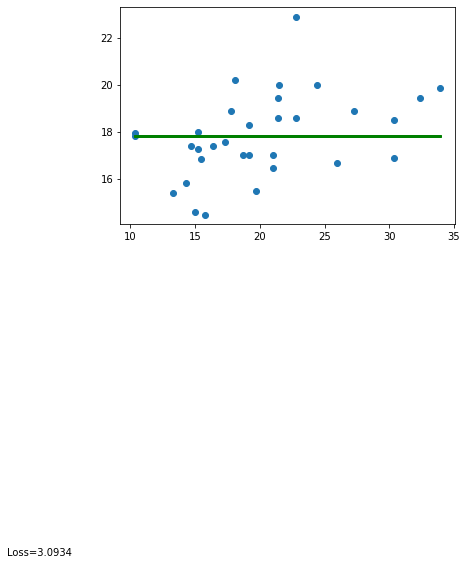

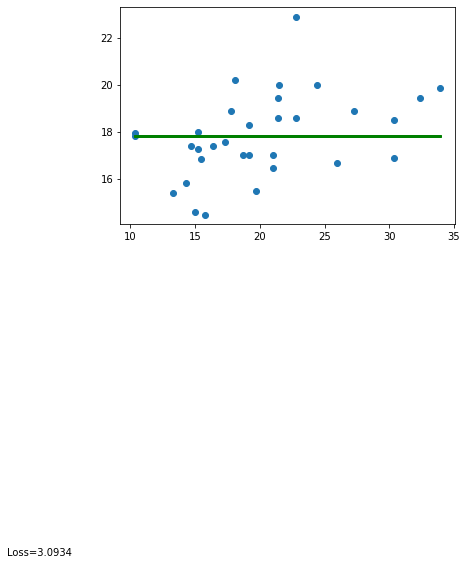

In [49]:
for t in range(1000):
    prediction = net(x)     # input x and predict based on x
    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)
    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

    if t % 200 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'g-', lw=3)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy())
        plt.show()
plt.ioff() #Turn the interactive mode off

In [50]:
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
